<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing PYOBIS

In [3]:
try:
  import pyobis
except:
  %pip -v install pyobis
  import pyobis

Using pip 22.1.2 from /opt/conda/lib/python3.7/site-packages/pip (python 3.7)
Note: you may need to restart the kernel to use updated packages.


## Importing Necessary Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery
import warnings
warnings.filterwarnings('ignore')

In [7]:
try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

In [8]:
try:
  import cartopy as cp
except:
  %pip -q install cartopy
  import cartopy as cp

In [9]:
occ = OccQuery()

In [10]:
STARTDATE = "1999-01-01"
ENDDATE = "2017-12-31"
GEOMETRY = "POLYGON ((17.4024 -42.7827,	18.1055 -56.2070, 45.2930 -56.0765, 43.7695 -43.3815, 17.4024 -42.7827))"
SPECIES = "Euphausiidae Dana"

In [40]:
df = occ.search(startdate=STARTDATE, enddate=ENDDATE,scientificname=SPECIES,size=100000)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 100000/100000
Fetched 100000 records.


In [15]:
df.head()

,infraphylum,country,date_year,scientificNameID,scientificName,individualCount,dropped,gigaclassid,aphiaID,decimalLatitude,...,georeferencedDate,verbatimEventDate,sampleSizeUnit,georeferencedBy,georeferenceProtocol,georeferenceVerificationStatus,sampleSizeValue,taxonomicStatus,verbatimDepth,collectionID
0,Gnathostomata,United States,2002,urn:lsid:marinespecies.org:taxname:126417,Clupea harengus,3,False,10194,126417,43.9640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,Denmark,2006,urn:lsid:marinespecies.org:taxname:126417,Clupea harengus,684.0,False,10194,126417,55.9593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,France,2009,urn:lsid:marinespecies.org:taxname:126417,Clupea harengus,8133.0,False,10194,126417,55.0345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,Norway,2011,urn:lsid:marinespecies.org:taxname:126417,Clupea harengus,18.0,False,10194,126417,60.0650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,Denmark,2010,urn:lsid:marinespecies.org:taxname:126417,Clupea harengus,1683.0,False,10194,126417,57.5045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[df["minimumDepthInMeters"].isnull()!=True]["scientificName"].value_counts()

Clupea harengus    334
Name: scientificName, dtype: int64

Came to know about the availability of depth samples (in descending order) for above species from datapoints of around 300K of different species\.  
↦ Exploring on **Calanoida** phylum (of algae) containing around 1800 species of zooplankton across the globe.

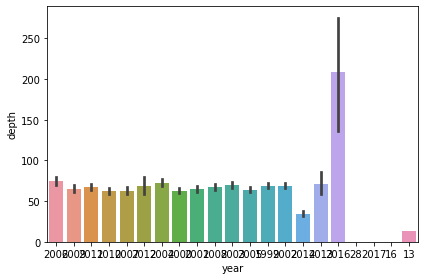

In [27]:
sns.barplot('year','depth',data=df);
plt.tight_layout()

In [39]:
df.select_dtypes(include=['datetime']).columns

Index([], dtype='object')

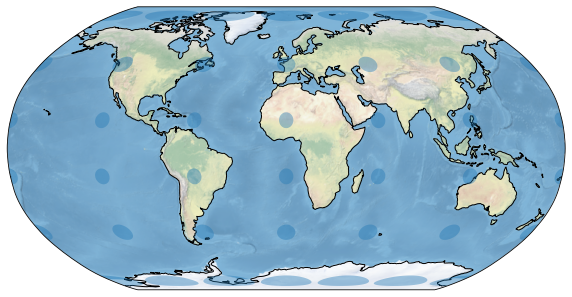

In [46]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection=cp.crs.Robinson())

ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(alpha=0.4)


<AxesSubplot:ylabel='Frequency'>

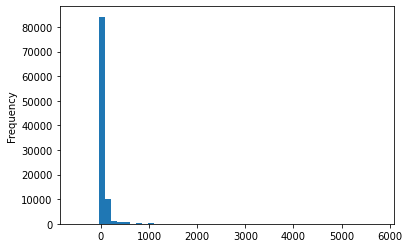

In [50]:
df.depth.plot.hist(bins=50)

<AxesSubplot:xlabel='depth', ylabel='Count'>

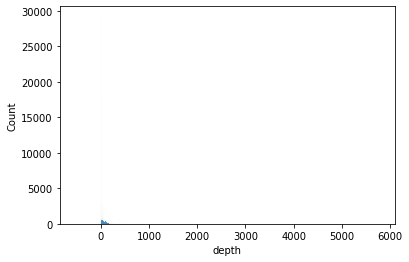

In [56]:
sns.histplot(data=df, x="depth")